In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


Problem 2: German Credit Dataset (72 points)
Given a CSV data file as represented by the sample file GermanCredit.csv (1000 records), load it into a Pandas DataFrame, and perform the following tasks on it.

Preprocessing (31 pts)
1. [8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [2]:
credits = pd.read_csv(open("GermanCredit.csv"))
column_arr = []
for (columnName, columnData) in credits.iteritems():
    empty_list = columnData[columnData == 'none'].tolist()
    column_arr.append((len(empty_list), columnName, credits.columns.get_loc(columnName)))
sorted_arr = sorted(column_arr, reverse=True, key = lambda x: (x[0], -x[2], x[1]))
for i in range(3):
    del credits[sorted_arr[i][1]]
credits


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


2. [4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.


In [3]:
def strip_apos(x):
    if isinstance(x, str):
        return x.strip("\'")
    return x
credits = credits.applymap(strip_apos)
credits

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


3. [5 pts] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.


In [4]:
categories = ['no checking', '<0', '0<=X<200',  '>=200']
replacement = ['No Checking', 'Low', 'Medium', 'High']
for i in range(4):
    credits.loc[credits['checking_status'] == categories[i], 'checking_status'] = replacement[i]
credits


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


4. The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').

In [5]:
savings_categories = ['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000']
savings_replacement = ['No Savings', 'Low', 'Medium', 'High', 'High']
for i in range(5):
    credits.loc[credits['savings_status'] == savings_categories[i], 'savings_status'] = savings_replacement[i]
credits


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


5. [4 pts] Change class column values from 'good' to '1' and 'bad' to '0'.

In [6]:
credits.loc[credits['class'] == 'good', 'class'] = '1'
credits.loc[credits['class'] == 'bad', 'class'] = '0'
credits


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


6. [5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.


In [7]:
employment_categories = ['unemployed','<1','1<=X<4','4<=X<7','>=7']
employment_replacement = ['Unemployed', 'Amateur', 'Professional', 'Experienced', 'Expert']
for i in range(5):
    credits.loc[credits['employment'] == employment_categories[i], 'employment'] = employment_replacement[i]
credits


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


<b>Analysis (17 pts) </b>

For the following tasks, do preprocessing or changing of data types in the data frame as required.

1. [5 pts] Often we need to find correlations between categorical attributes, i.e. attributes that have
values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for
attr2.
One such correlation is to find counts in combinations of categorial values across attributes, as in
how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use
the Pandas crosstab function. Do this for the following two counts.

    a. [3 pts] Get the count of each category of foreign workers (yes and no) for each class of credit
(good and bad).


In [8]:
pd.crosstab(credits['foreign_worker'],credits['class'])

class,0,1
foreign_worker,,
no,4,33
yes,296,667


    b. [2 pts] Similarly, get the count of each category of employment for each category of saving_status.



In [9]:
pd.crosstab(credits['employment'],credits['savings_status'])

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


2. [4 pts] Find the average credit_amount of single males that have 4<=X<7 years of employment. You
can leave the raw result as is, no need for rounding.

In [10]:
credits[credits['employment'] == 'Experienced']['credit_amount'].mean()

3601.6954022988507

3. [4 pts] Find the average credit duration for each of the job types. You can leave the raw result as is,
no need for rounding.


In [11]:
avgcd = credits.groupby('job')
avgcd.mean()['duration']

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

4. [4 pts] For the purpose 'education', what is the most common checking_status and savings_status?

Your code should print:

 Most common checking status: ...
 
 Most common savings status: ...


In [12]:
checkingCount = credits[credits['purpose'] == 'education']['checking_status'].value_counts()
print("Most common checking status: ", checkingCount[checkingCount == checkingCount.max()].index.tolist()[0])

savingsCount = credits[credits['purpose'] == 'education']['savings_status'].value_counts()

print("Most common savings status: ", savingsCount[savingsCount == savingsCount.max()].index.tolist()[0])


Most common checking status:  No Checking
Most common savings status:  Low


<b> Visualization (24 pts) </b>

1. [9 pts] Plot subplots of two bar charts: one for savings_status (x-axis) to personal status (y-axis), and another for checking_status (x-axis) to personal_status (y-axis). In each of the charts, each personal status category bar (number of people in that category) should be of a different color.


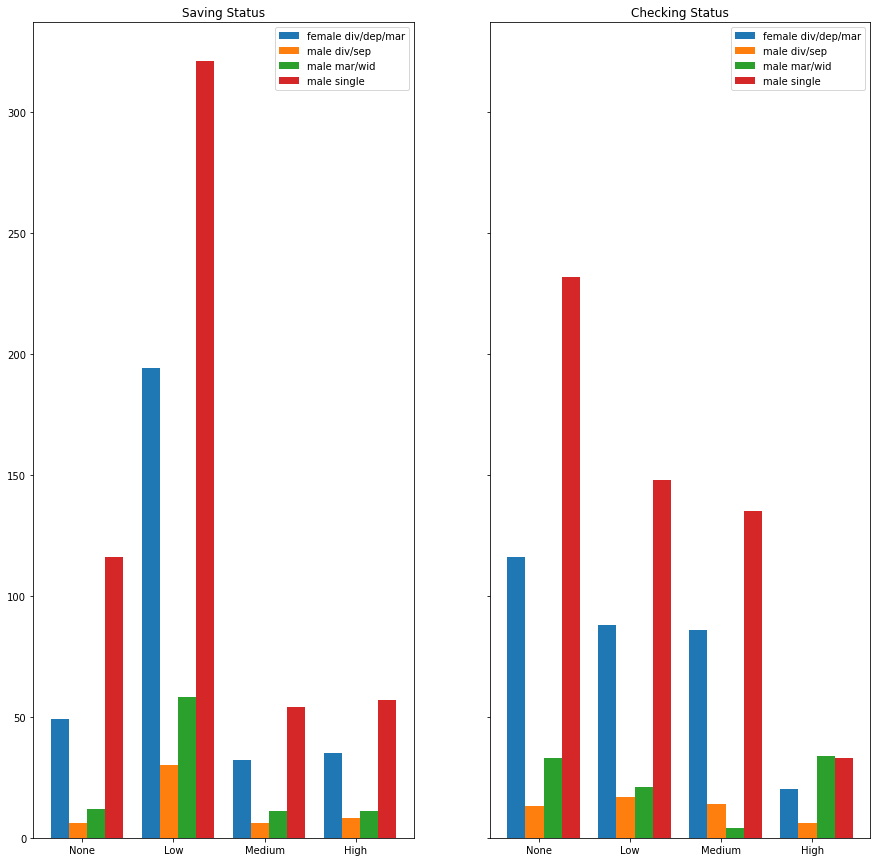

In [13]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)
ax1.set_title('Saving Status')
ax2.set_title('Checking Status')

fig.set_figheight(15)
fig.set_figwidth(15)


save  = credits.groupby(['savings_status','personal_status']).count()
y1 = [
    save.loc['No Savings','female div/dep/mar']['purpose'],
    save.loc['Low','female div/dep/mar']['purpose'],
    save.loc['Medium','female div/dep/mar']['purpose'],
    save.loc['High','female div/dep/mar']['purpose']
]

y2 = [
    save.loc['No Savings','male div/sep']['purpose'],
    save.loc['Low','male div/sep']['purpose'],
    save.loc['Medium','male div/sep']['purpose'],
    save.loc['High','male div/sep']['purpose']

]

y3 = [
    save.loc['No Savings','male mar/wid']['purpose'],
    save.loc['Low','male mar/wid']['purpose'],
    save.loc['High','male mar/wid']['purpose'],
    save.loc['Medium','male mar/wid']['purpose']
]

y4 = [
    save.loc['No Savings','male single']['purpose'],
    save.loc['Low','male single']['purpose'],
    save.loc['Medium','male single']['purpose'],
    save.loc['High','male single']['purpose']
]


x1 = [5,25,45,65]

x2 = [9,29,49,69]
x3 = [13,33,53,73]
x4 = [17,37,57,77]
ax1.bar(x1,y1,4,label='female div/dep/mar') # width = 4
ax1.bar(x2,y2,4,label='male div/sep') # width = 4
ax1.bar(x3,y3,4,label='male mar/wid') # width = 4
ax1.bar(x4,y4,4,label='male single') # width = 4
ax1.set_xticks([10,30,50,70])   # map labels to numeric tick values
ax1.set_xticklabels(['None','Low','Medium','High'])
ax1.legend()


############################

check  = credits.groupby(['checking_status','personal_status']).count()

y5 = [
    check.loc['No Checking','female div/dep/mar']['purpose'],
    check.loc['Low','female div/dep/mar']['purpose'],
    check.loc['Medium','female div/dep/mar']['purpose'],
    check.loc['High','female div/dep/mar']['purpose']
]

y6 = [
    check.loc['No Checking','male div/sep']['purpose'],
    check.loc['Low','male div/sep']['purpose'],
    check.loc['Medium','male div/sep']['purpose'],
    check.loc['High','male div/sep']['purpose']

]

y7 = [
    check.loc['No Checking','male mar/wid']['purpose'],
    check.loc['Low','male mar/wid']['purpose'],
    check.loc['Medium','male mar/wid']['purpose'],
    check.loc['High','male mar/wid']['purpose']
]

y8 = [
    check.loc['No Checking','male single']['purpose'],
    check.loc['Low','male single']['purpose'],
    check.loc['Medium','male single']['purpose'],
    check.loc['High','male single']['purpose']
]

x5 = [5,25,45,65]

x6 = [9,29,49,69]
x7 = [13,33,53,73]
x8 = [17,37,57,77]
ax2.bar(x5,y5,4,label='female div/dep/mar') # width = 4
ax2.bar(x6,y6,4,label='male div/sep') # width = 4
ax2.bar(x7,y7,4,label='male mar/wid') # width = 4
ax2.bar(x8,y8,4,label='male single') # width = 4
ax2.set_xticks([10,30,50,70])   # map labels to numeric tick values
ax2.set_xticklabels(['None','Low','Medium','High'])
ax1.legend()
ax2.legend()


plt.show()


2. [9 pts] For people having credit_amount more than 4000, plot a bar graph which maps
property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).


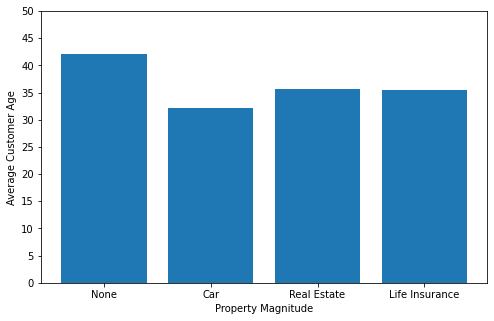

In [14]:
means = credits[credits['credit_amount'] > 4000].groupby('property_magnitude').mean()

# alternatively, can give a numeric range for xticks, and map labels to the tick numbers
magnitudes = ['None','Car','Real Estate','Life Insurance']
x1 = means.loc['no known property']['age']
x2 = means.loc['car']['age']
x3 = means.loc['real estate']['age']
x4 = means.loc['life insurance']['age']
nums = [x1,x2,x3,x4]
plt.figure(figsize=(8,5))
plt.bar(range(len(nums)), nums)
plt.xticks(range(len(nums)), magnitudes)  # first arg is numeric set, second is mapped labels
plt.yticks(range(0,51,5))
plt.xlabel('Property Magnitude')
plt.ylabel('Average Customer Age')
plt.show()

3. [6 pts] For people with a "High" savings_status and age above 40, use subplots to plot the following
pie charts:

a. Personal status

b. Credit history

c. Job

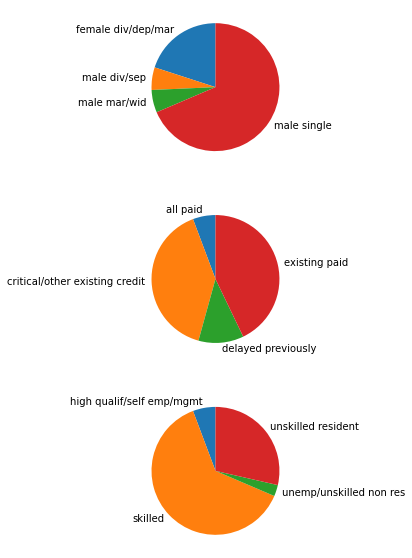

In [15]:
filtered = credits[(credits['savings_status'] == 'High') & (credits['age'] > 40)]

labels1 = ['female div/dep/mar','male div/sep','male mar/wid','male single']
count = filtered.groupby('personal_status').count()['age']
personalStatusCounts = [count['female div/dep/mar'],count['male div/sep'], count['male mar/wid'], count['male single']]
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.pie(personalStatusCounts, labels=labels1, startangle=90)

labels2 = ['all paid','critical/other existing credit','delayed previously','existing paid']
count2 = filtered.groupby('credit_history').count()['age']
creditHistoryCounts = [count2['all paid'], count2['critical/other existing credit'], count2['delayed previously'], count2['existing paid']]
ax2.pie(creditHistoryCounts, labels=labels2, startangle=90)

labels3 = ['high qualif/self emp/mgmt','skilled','unemp/unskilled non res','unskilled resident']
count3 = filtered.groupby('job').count()['age']
jobCounts = [count3['high qualif/self emp/mgmt'], count3['skilled'], count3['unemp/unskilled non res'], count3['unskilled resident']]
ax3.pie(jobCounts, labels=labels3, startangle=90)
plt.show()